<a href="https://colab.research.google.com/github/peterbmob/Labs/blob/main/huckel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# First we need some graphics magic and libraries
%matplotlib inline
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import seaborn as sns
# Improve readability of output
np.set_printoptions(precision=3,suppress=True)

In [5]:
# HMO for Ethylene
H2 = np.array([[0,1],[1,0]])
# Calculate Eigenvectors and Eigenvalues
l,v = eig(H2)
# Print Matrix, Eigenvalues, and Eigenvectors
print('HMO for Ethylene')

HMO for Ethylene


In [6]:
print(H2)
print('V=', v.T[0],'\u03BB=', l[0])
print('V=', v.T[1],'\u03BB=', l[1])


[[0 1]
 [1 0]]
V= [0.707 0.707] λ= 1.0
V= [-0.707  0.707] λ= -1.0


In [9]:
# HMO for Butadiene
H4 = np.array([
[0,1,0,0],
[1,0,1,0],
[0,1,0,1],
[0,0,1,0]
])
# Calculate Eigenvectors and Eigenvalues
l,v = eig(H4)
# Print Matrix, Eigenvalues, and Eigenvectors
print('HMO for Butadiene')
print(H4)
print('Eigenvalues: \n', l)
print('Eigenvectors: \n', v)

HMO for Butadiene
[[0 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]
Eigenvalues: 
 [-1.618 -0.618  1.618  0.618]
Eigenvectors: 
 [[ 0.372  0.602 -0.372 -0.602]
 [-0.602 -0.372 -0.602 -0.372]
 [ 0.602 -0.372 -0.602  0.372]
 [-0.372  0.602 -0.372  0.602]]


In [13]:
# HMO for Cyclobutadiene
C4 = np.array([
[0,1,0,1],
[1,0,1,0],
[0,1,0,1],
[1,0,1,0]
])


In [14]:
# Calculate Eigenvectors and Eigenvalues
l,v = eig(C4)
# Print Matrix, Eigenvalues, and Eigenvectors
print('HMO for Cyclobutadiene')
print(C4)
print('Eigenvalues: \n', l)
print('Eigenvectors: \n', v)

HMO for Cyclobutadiene
[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]
Eigenvalues: 
 [-2.  0.  2.  0.]
Eigenvectors: 
 [[ 0.5   -0.707  0.5    0.   ]
 [-0.5   -0.     0.5   -0.707]
 [ 0.5    0.707  0.5    0.   ]
 [-0.5   -0.     0.5    0.707]]


In [21]:
def linearHuckel(n):
   '''linearHuckel generates Huckel adjacency matrix for linear polyene with n␣,→sp2 carbons Input: n - integer number of sp2 carbons, 2 or greater Output: n x n matrix'''
   return np.diag(np.ones(n-1),1) + np.diag(np.ones(n-1),-1)
def printEigen(H):
   '''printEigen prints Eigenvalues and Eigenvectors for given matrix Input: n x n matrix Output: print of input matrix and Eigenvalues/Eigenvectors'''
   L,V = eig(H)
   reorder = L.argsort()
   np.set_printoptions(precision=3,suppress=True)
   print('Huckel Matrix: ')
   print(H)
   print('Eigenvalues:')
   print(L[reorder])
   print('Eigenvectors: ')
   print(V[:,reorder])

In [22]:
# plt.figure(figsize=(8,8))
H8 = linearHuckel(8)
printEigen(H8)

Huckel Matrix: 
[[0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]
Eigenvalues:
[-1.879 -1.532 -1.    -0.347  0.347  1.     1.532  1.879]
Eigenvectors: 
[[ 0.161  0.303 -0.408  0.464  0.464  0.408  0.303  0.161]
 [-0.303 -0.464  0.408 -0.161  0.161  0.408  0.464  0.303]
 [ 0.408  0.408  0.    -0.408 -0.408 -0.     0.408  0.408]
 [-0.464 -0.161 -0.408  0.303 -0.303 -0.408  0.161  0.464]
 [ 0.464 -0.161  0.408  0.303  0.303 -0.408 -0.161  0.464]
 [-0.408  0.408 -0.    -0.408  0.408 -0.    -0.408  0.408]
 [ 0.303 -0.464 -0.408 -0.161 -0.161  0.408 -0.464  0.303]
 [-0.161  0.303  0.408  0.464 -0.464  0.408 -0.303  0.161]]


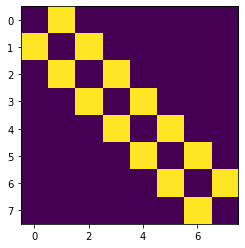

In [24]:
plt.imshow(H8)

In [28]:
# Alternative calculation for Cyclobutadiene
C4 = linearHuckel(4) # first generate linear (butadiene) matrix
C4[0,3]=1 # then add one bond to close the cycle
C4[3,0]=1 # this needs to be done twice - matrix is symmetric
printEigen(C4) # print results
#sns.heatmap(C4,cbar=False,square=True,cmap=plt.get_cmap('BuGn')) # chessboard␣,→matrix of Cyclobutadiene

Huckel Matrix: 
[[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]
Eigenvalues:
[-2.  0.  0.  2.]
Eigenvectors: 
[[ 0.5    0.    -0.707  0.5  ]
 [-0.5   -0.707 -0.     0.5  ]
 [ 0.5    0.     0.707  0.5  ]
 [-0.5    0.707 -0.     0.5  ]]


In [29]:
 # calculation for Naphthalene
C10 = linearHuckel(10) # first generate linear (decapentaene) matrix
C10[0,9]=1 # then add one bond to close the cycle
C10[9,0]=1 # this needs to be done twice - matrix is symmetric
C10[2,7]=1 # add one more bond down the middle
C10[7,2]=1 # and repeat for symmetry
printEigen(C10) # print results

Huckel Matrix: 
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Eigenvalues:
[-2.303 -1.618 -1.303 -1.    -0.618  0.618  1.     1.303  1.618  2.303]
Eigenvectors: 
[[-0.231 -0.425  0.174  0.408  0.263  0.263 -0.408 -0.174  0.425  0.231]
 [ 0.301  0.263 -0.4   -0.    -0.425  0.425  0.    -0.4    0.263  0.301]
 [-0.461 -0.     0.347 -0.408  0.     0.     0.408 -0.347  0.     0.461]
 [ 0.301 -0.263 -0.4    0.     0.425 -0.425  0.    -0.4   -0.263  0.301]
 [-0.231  0.425  0.174  0.408 -0.263 -0.263 -0.408 -0.174 -0.425  0.231]
 [ 0.231 -0.425  0.174 -0.408 -0.263  0.263 -0.408  0.174 -0.425  0.231]
 [-0.301  0.263 -0.4    0.     0.425  0.425 -0.     0.4   -0.263  0.301]
 [ 0.461 -0.     0.347  0.408 -0.    -0.  

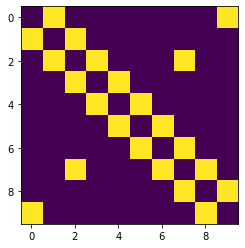

In [31]:
plt.imshow(C10)


In [33]:
# HMO for acrolein
A = linearHuckel(4) # First build the standard tridiagonal matrix of dimension␣,→4
A[3,3]=2 # Change the alpha for element corresponding to O atom␣,→from 0 to 2
# (remember Python indeces start with 0)
printEigen(A)


Huckel Matrix: 
[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 2.]]
Eigenvalues:
[-1.496 -0.22   1.22   2.496]
Eigenvectors: 
[[-0.452 -0.684  0.567  0.083]
 [ 0.676  0.15   0.691  0.207]
 [-0.559  0.651  0.276  0.433]
 [ 0.16  -0.293 -0.354  0.874]]


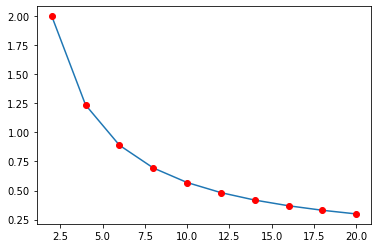

In [38]:
# Calculate HOMO-LUMO Enegy gap for a set of polyenes
def gap(H):
   '''gap calculates HOMO-LUMO gap for polyenes with even number of sp2 carbons
   Input: H matrix
   Output: HOMO-LUMO energy difference
   '''
   L = np.sort(eig(H)[0])
   half = len(L)//2
   return L[half] - L[half - 1]
N = 10 # number of structures
gapSeries = np.zeros(N)
for n in range(N):
   H = linearHuckel(2*(n+1))
   gapSeries[n] = gap(H)

plt.plot(np.arange(N)*2+2,gapSeries)
plt.plot(np.arange(N)*2+2,gapSeries,'ro')
